# EDA: Exploring and Visualizing My Music Taste
___

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import sys
from get_tracks_methods import handler, authenticate, flatten_tracks,\
get_track_audio_features, merger

In [2]:
my_tracks = pd.read_csv('../data/allmy_tracks_with_features.csv', index_col=0)

- NOTE: This EDA existed across Versions 1-3

___
# EDA Plan

- My first priority is to explore the data that I have been able to collect, which for record keeping is:
    - All of my Liked Songs on Spotify
    - Of my Saved Playlists, all the songs from each
    - Combining both, removing nulls and duplicates across playlists
- As I will be recommending songs based off of trends from the Audio Features pulled from Spotify I want to deep dive on:
    - Are there any correlations between musical features?
        - These correlations can be between themselves as well as other features such as popularity
    - What are the distributions of these different musical features across my liked songs?
        - Is there any notable difference between my liked_songs and my other listened to playlists?
    - Ill need to pull in additional information, but do individual genres have set ranges of these musical features that help define them?
    - and more!
- Alternatively, although anecdotal, investigating my taste patterns will hopefully give me insight as to how I should structure my models
- As well as starting to create reproducible plots via specific functions to call for displaying a given user's info on my web app when we get to that stage.

### Let's start!
___

Creating a data dictionary for later but also to have all the variable definitions in front of me to make EDA a little easier:
___
<h1>Data Dictionary</h1>

|Feature|Type|Description|
|:---|:---:|:---|
|**id**|*object*|Spotify Web API Track ID|
|**track_name**|*object*|Name of Track|
|**artist**|*object*|Name of Artist|
|**artist_id**|*object*|Spotify Web API Artist ID|
|**album_id**|*object*|Spotify Web API Album ID|
|**album**|*object*|Spotify Web API Album ID|
|**release_date**|*object*|Date Track was released|
|**playlist_name**|*object*|Name of the Playlist the track was retrieved from|
|**popularity**|*int*|The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.|
|**explicit**|*boolean*|Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).|
|**user_liked**|*int*|Feature created to capture whether a not a song was pulled from the Liked Songs Playlist|
|**danceability**|*float*|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.|
|**energy**|*float*|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
|**key**|*int*|The key the track is in. Integers map to pitches using standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
|**loudness**|*float*|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.|
|**mode**|*int*|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|**speechiness**|*float*|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
|**acousticness**|*float*|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|**instrumentalness**|*float*|Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
|**liveness**|*float*|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.|
|**valence**|*float*|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
|**tempo**|*float*|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.|
|**duration_ms**|*int*|The duration of the track in milliseconds.|
|**time_signature**|*int*|An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".|

___

In [8]:
my_tracks.columns

Index(['id', 'track_name', 'artist', 'artist_id', 'album_id', 'album',
       'release_date', 'playlist_name', 'popularity', 'explicit', 'user_liked',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [9]:
my_tracks.head()

id    track_name          artist  \
0    2Nw6tjb0euV6LApzN4fU0a  Good for You     Spacey Jane   
427  276zciJ7Fg7Jk6Ta6QuLkp     Come Down  Anderson .Paak   
420  2gZUPNdnz5Y45eiGxpHGSc         POWER      Kanye West   
421  4qikXelSRKvoCqFcHLB2H2         Mercy      Kanye West   
422  3CcvahnsiArpTHYQEWV2Au  Bring Em Out            T.I.   

                  artist_id                album_id  \
0    6V70yeZQCoSR2M3fyW8qiA  3zZi1vy6CnNZX7lbcRJtXo   
427  3jK9MiCrA42lLAdMGUZpwa  4VFG1DOuTeDMBjBLZT7hCK   
420  5K4W6rqBFWDnAN6FQUkS6x  20r762YmB5HeofjMCiPMLv   
421  5K4W6rqBFWDnAN6FQUkS6x  0hmFRR0pDSZIAvoJqEFSKv   
422  4OBJLual30L7gRl5UkeRcT  1oFucub5OjyG4XPsDUzhil   

                                 album release_date playlist_name  popularity  \
0                             Sunlight   2020-06-12   Liked_Songs          60   
427                             Malibu   2016-01-15   Liked_Songs          66   
420  My Beautiful Dark Twisted Fantasy   2010-11-22   Liked_Songs          79   
421                              Mercy   2012-01-01   Liked_Songs          73   
422                       Urban Legend   2004-11-28   Liked_Songs          66   

     explicit  ...  loudness  mode  speechiness  acousticness  \
0        True  ...    -4.741     1       0.0385      0.000056   
427      True  ...    -7.135     1       0.1040      0.271000   
420      True  ...    -4.747     0       0.1130      0.016100   
421      True  ...    -9.381     0       0.4060      0.068500   
422      True  ...    -2.983     1       0.2570      0.029800   

     instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0            0.010600     0.165    0.931  174.962       174760               4  
427          0.015100     0.304    0.931   98.401       169727               4  
420          0.000000     0.744    0.576  153.993       292093               4  
421          0.000058     0.173    0.426  139.993       329320               4  
422          0.000000     0.141    0.587   98.579       216707               4  

[5 rows x 24 columns]

- For EDA we won't need id, artist_id, album_id, let's drop them in a copy df for now to do some initial exploration.
- Once we have gotten our feet wet, let's try and add genre per track (if available) and do some further exploration and create some cool visuals for the web app!

In [9]:
tracks = my_tracks.drop(columns=['id','artist_id','album_id']).copy()

In [10]:
tracks.head()

track_name          artist                              album  \
0    Good for You     Spacey Jane                           Sunlight   
427     Come Down  Anderson .Paak                             Malibu   
420         POWER      Kanye West  My Beautiful Dark Twisted Fantasy   
421         Mercy      Kanye West                              Mercy   
422  Bring Em Out            T.I.                       Urban Legend   

    release_date playlist_name  popularity  explicit  user_liked  \
0     2020-06-12   Liked_Songs          60      True           1   
427   2016-01-15   Liked_Songs          66      True           1   
420   2010-11-22   Liked_Songs          79      True           1   
421   2012-01-01   Liked_Songs          73      True           1   
422   2004-11-28   Liked_Songs          66      True           1   

     danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0           0.436   0.896  ...    -4.741     1       0.0385      0.000056   
427         0.841   0.898  ...    -7.135     1       0.1040      0.271000   
420         0.542   0.914  ...    -4.747     0       0.1130      0.016100   
421         0.563   0.496  ...    -9.381     0       0.4060      0.068500   
422         0.759   0.891  ...    -2.983     1       0.2570      0.029800   

     instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0            0.010600     0.165    0.931  174.962       174760               4  
427          0.015100     0.304    0.931   98.401       169727               4  
420          0.000000     0.744    0.576  153.993       292093               4  
421          0.000058     0.173    0.426  139.993       329320               4  
422          0.000000     0.141    0.587   98.579       216707               4  

[5 rows x 21 columns]

- Let's take a look at our description stats to get a better snapshot of our numerical features first:

In [11]:
tracks.describe()

popularity   user_liked  danceability       energy          key  \
count  2543.000000  2543.000000   2543.000000  2543.000000  2543.000000   
mean     37.710185     0.249312      0.582429     0.548701     5.433740   
std      24.387456     0.432700      0.174213     0.270031     3.547507   
min       0.000000     0.000000      0.061900     0.002930     0.000000   
25%      16.000000     0.000000      0.467500     0.322000     2.000000   
50%      43.000000     0.000000      0.595000     0.579000     6.000000   
75%      56.000000     0.000000      0.711000     0.780500     9.000000   
max      89.000000     1.000000      0.956000     0.997000    11.000000   

          loudness         mode  speechiness  acousticness  instrumentalness  \
count  2543.000000  2543.000000  2543.000000   2543.000000       2543.000000   
mean     -9.967221     0.676366     0.086659      0.385225          0.218726   
std       5.205172     0.467954     0.097045      0.359249          0.350413   
min     -34.967000     0.000000     0.023800      0.000005          0.000000   
25%     -12.725500     0.000000     0.035600      0.038150          0.000002   
50%      -8.925000     1.000000     0.047300      0.272000          0.001050   
75%      -6.043000     1.000000     0.082900      0.751000          0.387000   
max      -0.140000     1.000000     0.956000      0.996000          0.982000   

          liveness      valence        tempo   duration_ms  time_signature  
count  2543.000000  2543.000000  2543.000000  2.543000e+03     2543.000000  
mean      0.193974     0.518326   118.171466  2.320539e+05        3.923712  
std       0.167407     0.263194    29.678018  8.430545e+04        0.354359  
min       0.018800     0.026300    45.646000  3.405000e+04        1.000000  
25%       0.094200     0.293000    95.680000  1.790915e+05        4.000000  
50%       0.124000     0.531000   116.623000  2.167740e+05        4.000000  
75%       0.237500     0.743500   134.605500  2.662735e+05        4.000000  
max       0.986000     0.989000   236.799000  1.020563e+06        5.000000

Initial Observations:
- The mean popularity of my song taste is below the halfway mark of 50. This doesn't surprise me, but it is interesting to have it confirmed that the songs I listen to aren't on the popular side of things.
- Happy to see danceability, energy, and valence above the 50% mark, I like to think I love songs that you can move to as well have a more positive tone.
- This is probably not unique to myself given that the values of key relate to different keys a song can be in, my values range from min of 0 to max of 11, which according to the link provided in the data dictionary is the full spectrum of keys!

Let's try and create a plot that shows the different distributions of these audio features across:
- My liked tracks
- All my tracks
- The remaining tracks after removing liked tracks

___
### Distribution for All My Tracks

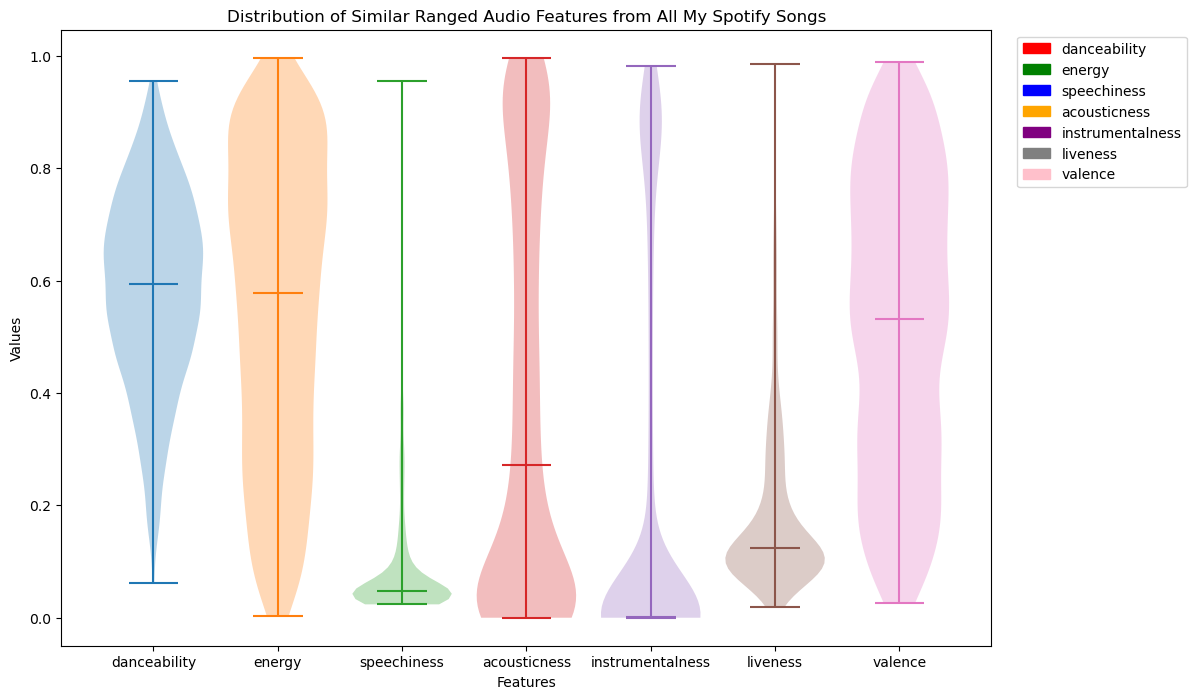

In [75]:
# Select the numerical features you want to display
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Create a list of colors for each violin
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'pink']

# Create the violin plot with a separate plot for each feature
fig, ax = plt.subplots(figsize=(12, 8))
handles = []
for i, feature in enumerate(features):
    ax.violinplot(dataset=tracks[feature], positions=[i], showmeans=False, showmedians=True, widths=0.8)
    handle = plt.Rectangle((0,0),1,1, color=colors[i], label=feature)
    handles.append(handle)
    
# Add x-axis and y-axis labels
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Distribution of Similar Ranged Audio Features from All My Spotify Songs')
# Set the x-tick labels to be the feature names
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features)

# Add a legend for the different colors
ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

- First Draft of this chart was almost successful, need to figure out how to align the different colors of the legend with the different colors of the distributions
- In class we learned to not use violin plots because they arent very interpretable, and after having made one I can agree to that.
    - However seen below, there aren't many options for viewing this kind of data in a distribution format
- Despite that, I think there are some valuable insights in regards to our data set:
    - We should expect energy, valence, danceability to have more even distributions throughout the data in regards to range of values
    - Speechiness and Liveness are expected shapes re their measurements, in both instances the lower the value the closer to music and recorded music they are respectively.
    - Acousticness and Instrumentalness mirror each other shape wise, but acousticness is more a confidence measure than an actual attribute of the music
- Features that I think will play a large factor in the songs that are recommended for my music taste:
    - Danceability, Energy, and Valence
    - Each of these are the closest to normally distributed of my music taste, and I would guess songs that are recommended to me will be based on the closeness of the mean of all 3 variables.
    - Curious to see how visualizing just my liked songs changes these shapes.

___
### Distribution for My Tracks Liked Tracks

In [4]:
liked_tracks = my_tracks[my_tracks['user_liked']==1].copy()

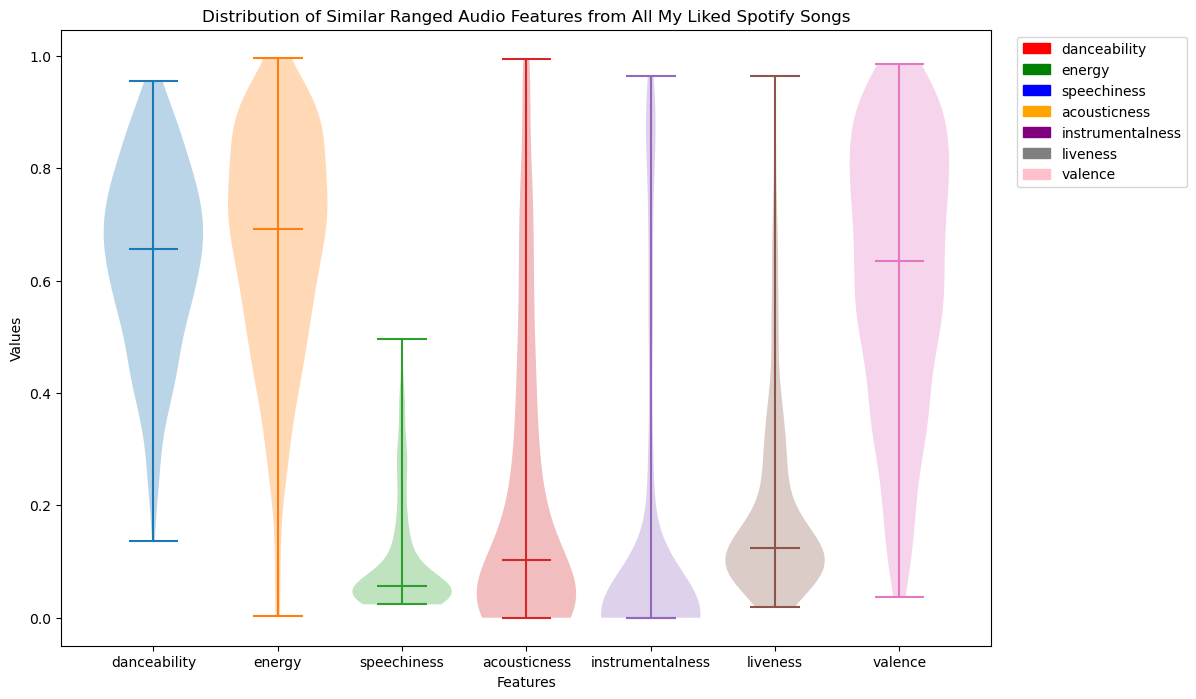

In [15]:
# Select the numerical features you want to display
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Create a list of colors for each violin
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'pink']

# Create the violin plot with a separate plot for each feature
fig, ax = plt.subplots(figsize=(12, 8))
handles = []
for i, feature in enumerate(features):
    ax.violinplot(dataset=liked_tracks[feature], positions=[i], showmeans=False, showmedians=True, widths=0.8)
    handle = plt.Rectangle((0,0),1,1, color=colors[i], label=feature)
    handles.append(handle)
    
# Add x-axis and y-axis labels
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Distribution of Similar Ranged Audio Features from All My Liked Spotify Songs')
# Set the x-tick labels to be the feature names
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features)

# Add a legend for the different colors
ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

- While following similar shapes, I am happy to see there is more definition to my taste than the previous distribution.
- Happy to see that danceability, energy, and valence retain their shape/distributions:
    - For all three, my liked songs center around higher values in comparison to Songs only taken from playlists as seen in the below
- Now that we are visualizing just my liked songs, the distributions and shapes of the other similarly ranged features are more defined.
- Need to continue to brainstorm different views to load on my web app for the users, this is interesting visual information.

___
### Distribution for My Tracks minus my Liked Tracks

In [13]:
playlistonly_tracks = my_tracks[my_tracks['user_liked']==0].copy()

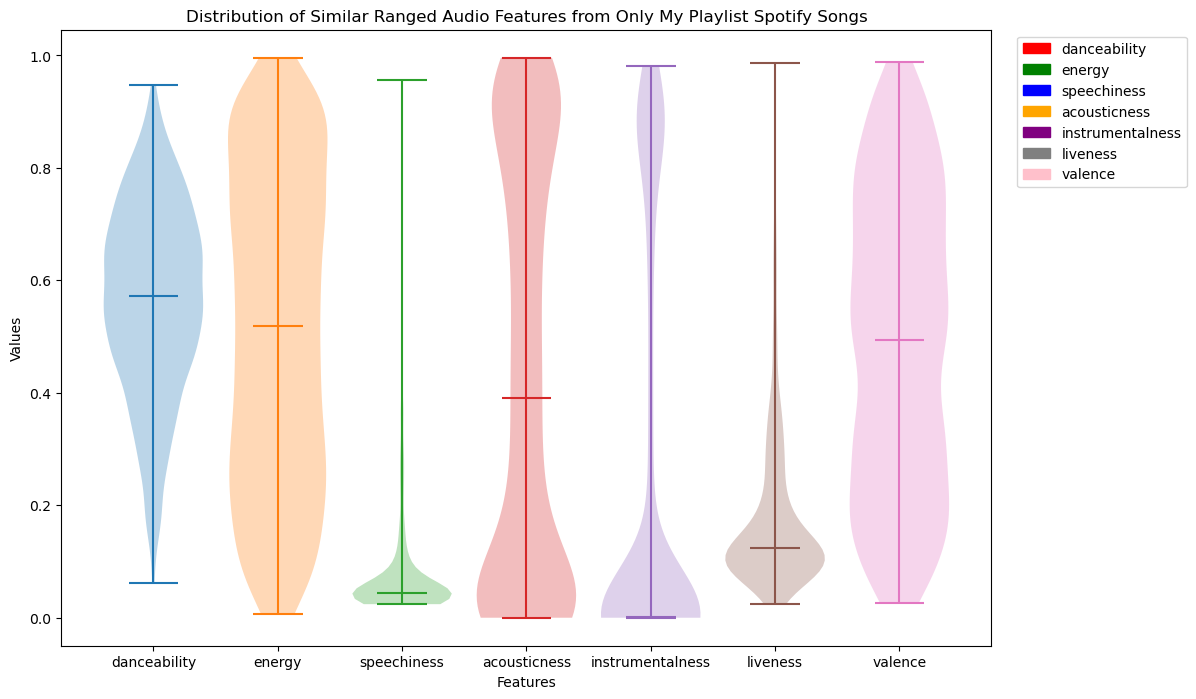

In [16]:
# Select the numerical features you want to display
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Create a list of colors for each violin
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'pink']

# Create the violin plot with a separate plot for each feature
fig, ax = plt.subplots(figsize=(12, 8))
handles = []
for i, feature in enumerate(features):
    ax.violinplot(dataset=playlistonly_tracks[feature], positions=[i], showmeans=False, showmedians=True, widths=0.8)
    handle = plt.Rectangle((0,0),1,1, color=colors[i], label=feature)
    handles.append(handle)
    
# Add x-axis and y-axis labels
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Distribution of Similar Ranged Audio Features from Only My Playlist Spotify Songs')
# Set the x-tick labels to be the feature names
ax.set_xticks(range(len(features)))
ax.set_xticklabels(features)

# Add a legend for the different colors
ax.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

- Only comment is after seeing the distributions of my liked songs, it is clear where the imbalances came from in the original image that contained all songs, my music taste is visually to me now more distinct in relation to these variables
- This gives me more hope in being able to accurately classify songs I have not liked yet fitting a recognizable pattern in the noise.

___
### Attempt at different Distribution Visuals outside of Violin Plots

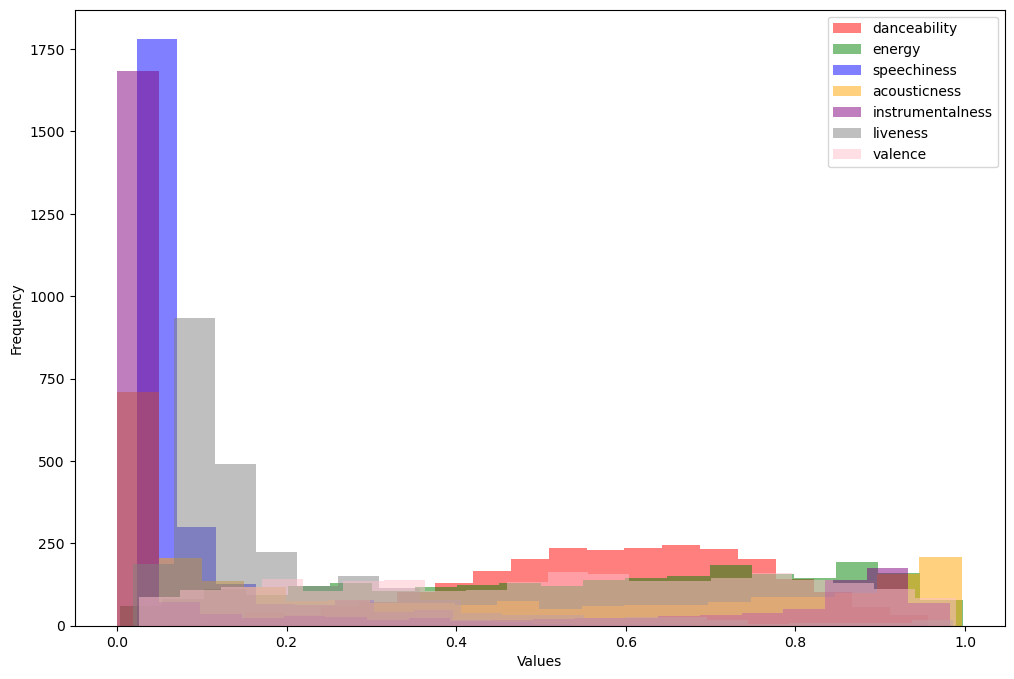

In [65]:
# Select the numerical features you want to display
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Create a list of colors for each feature
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'pink', 'brown', 'black']

# Create the overlapping histogram with a separate histogram for each feature
fig, ax = plt.subplots(figsize=(12, 8))
for i, feature in enumerate(features):
    ax.hist(tracks[feature], bins=20, alpha=0.5, color=colors[i], label=feature)

# Add x-axis and y-axis labels
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')

# Add a legend for the different features
ax.legend()

plt.show()

- Wasn't hopeful this would be a better visual, but just another visual to not include

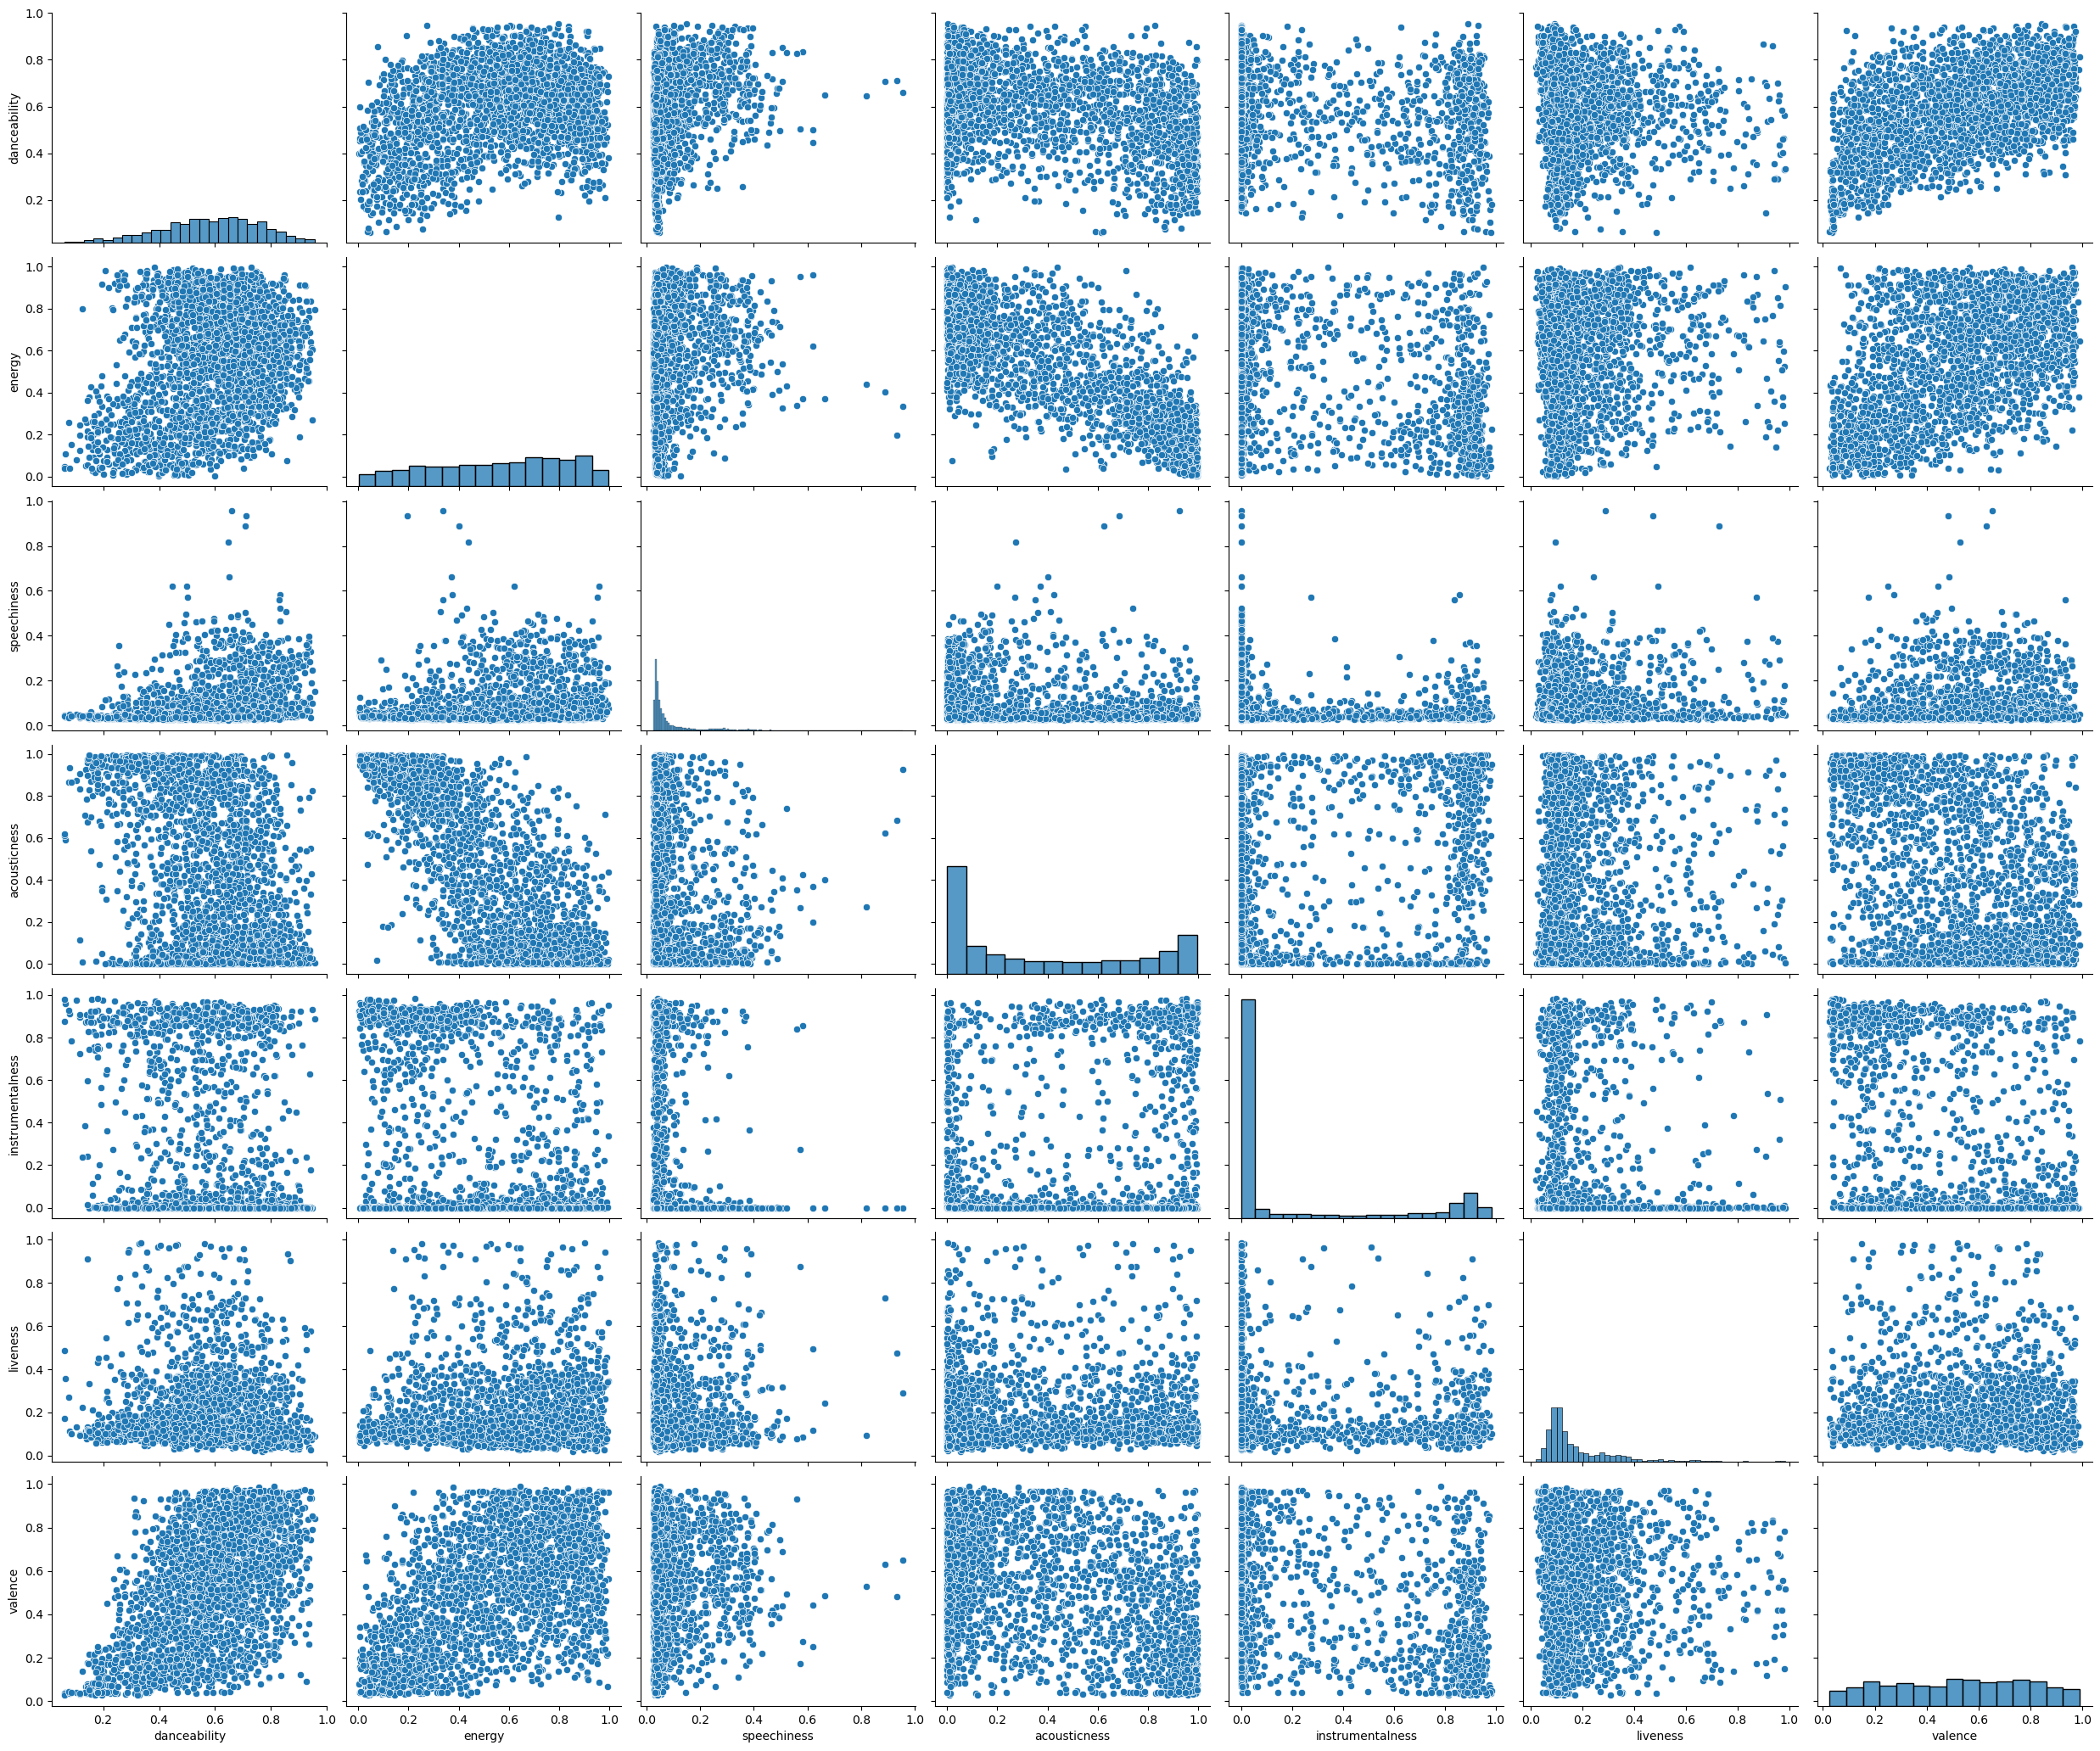

In [68]:
# only get the audio track features
tracks_audio_features = tracks.loc[:, ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]

# pairplot of tracks and track features
sns.pairplot(tracks_audio_features, height=3, aspect=1.2);

### Overall from Distributions:
- The only "linear" (barely) like relationships in these features are:
    - Danceability and Valence
        - Considering that high scores in Valence mean higher positivity(happy, cheerful, euphoric) and high scores in dance mean more danceable, that tracks (pun intended)
- From a distribution of variables in comparison to my analysis of the violin plot, the most normally distributed is still danceability 
- All others are either skewed right:
    - liveness
    - speechiness
- Or not normally distributed
____

### Correlation between variables

- Didn't expect the heatmap to be too helpful, but was curious at a high visual color level what could standout:
    - Loudness and Energy: 0.84
    - Explicit and Speechiness: 0.504
    - Valence and Danceability: 0.506
    - Energy and Accousticness: -0.808
    - Loudness and Accousticness: -.705
- Something I find interesting is this duality of Energy and Accousticness, and that Loudness which has a high correlation with Energy, has a high negative correlation with Acousticness. Maybe that isn't statistically suprising, but i think it is a cool example of symmetry.
- Checking the correlation of different variables in popularity and my user_liked songs, there aren't any strong correlations:
    - Strongest for popularity: Popularity and Danceability: 0.251
    - Strongest for user_liked: user_liked and Acousticness: -0.252

In [69]:
corr = tracks.corr()

In [74]:
corr[['popularity', 'user_liked']]

popularity  user_liked
popularity          1.000000    0.179865
explicit            0.225451    0.168727
user_liked          0.179865    1.000000
danceability        0.251021    0.188697
energy              0.102961    0.239916
key                 0.053563   -0.000767
loudness            0.053567    0.194338
mode               -0.122045   -0.061814
speechiness         0.161599    0.100818
acousticness       -0.175142   -0.252561
instrumentalness    0.079179   -0.141279
liveness           -0.061253    0.026745
valence             0.081981    0.200977
tempo              -0.033935    0.006528
duration_ms         0.050814    0.133677
time_signature      0.057438    0.065081

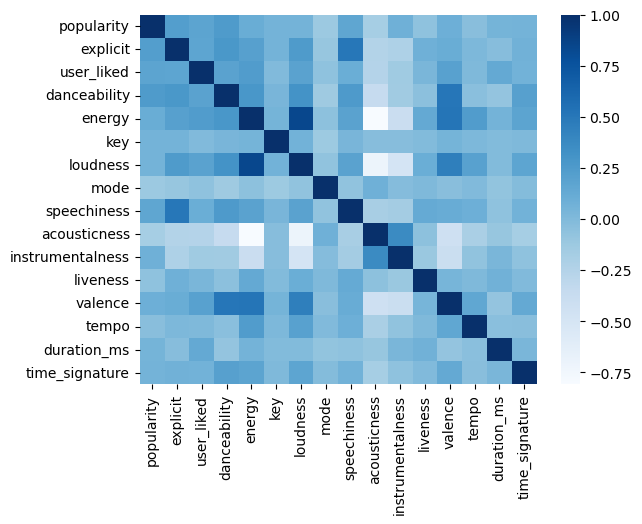

In [72]:
sns.heatmap(corr, cmap="Blues");

## Correlation Insights
- Didn't expect the heatmap to be too helpful, but was curious at a high visual color level what could standout:
    - Loudness and Energy: 0.84
    - Explicit and Speechiness: 0.504
    - Valence and Danceability: 0.506
    - Energy and Accousticness: -0.808
    - Loudness and Accousticness: -.705
- Something I find interesting is this duality of Energy and Accousticness, and that Loudness which has a high correlation with Energy, has a high negative correlation with Acousticness. Maybe that isn't statistically suprising, but i think it is a cool example of symmetry.
- Checking the correlation of different variables in popularity and my user_liked songs, there aren't any strong correlations:
    - Strongest for popularity: Popularity and Danceability: 0.251
    - Strongest for user_liked: user_liked and Acousticness: -0.252

___
## Pulling Genres
___

- **NOTE** Later in 03_Model_User_Data I attempt ways of One Hot Encoding Genres in a larger dataset but ultimately run out of local memory to process

## Initial Genre Gathering Attemps

- First we will reset the index of the original dataframe my_tracks
- Create a seperate df of only the id columns
- import sys to pull in get_tracks_methods from a sister directory
- Pull genres from artist api metadata

In [22]:
my_tracks = my_tracks.reset_index()

In [23]:
my_ids = my_tracks[['id','artist_id','album_id']]

In [24]:
my_ids.columns

Index(['id', 'artist_id', 'album_id'], dtype='object')

In [25]:
my_ids.head()

id               artist_id                album_id
0  2Nw6tjb0euV6LApzN4fU0a  6V70yeZQCoSR2M3fyW8qiA  3zZi1vy6CnNZX7lbcRJtXo
1  276zciJ7Fg7Jk6Ta6QuLkp  3jK9MiCrA42lLAdMGUZpwa  4VFG1DOuTeDMBjBLZT7hCK
2  2gZUPNdnz5Y45eiGxpHGSc  5K4W6rqBFWDnAN6FQUkS6x  20r762YmB5HeofjMCiPMLv
3  4qikXelSRKvoCqFcHLB2H2  5K4W6rqBFWDnAN6FQUkS6x  0hmFRR0pDSZIAvoJqEFSKv
4  3CcvahnsiArpTHYQEWV2Au  4OBJLual30L7gRl5UkeRcT  1oFucub5OjyG4XPsDUzhil

- using sys library to append a path to the original folder that get_track_methods was stored

In [26]:
sys.path.append('../01_data_retrieval')

In [27]:
import get_tracks_methods

In [28]:
sp = get_tracks_methods.authenticate(scope='user-library-read')

In [29]:
my_ids.shape

(2543, 3)

In [116]:
%%time
# get_track_genres(sp, df):
genres = []
# iterate through batches of 50 tracks at a time
for i in range(0, my_ids.shape[0], 50):
    # batch of ids = iteratives of 50
    batch_ids = my_ids['id'][i:i+50]
    # tracks of this batch of ids from the tracks 
    tracks = sp.tracks(batch_ids)['tracks']
    
    for track in tracks:
        # after some research, i was able to get most genres by pulling it from artist metadata
        # https://github.com/spotify/web-api/issues/31
        # from track pull artist uri
        artist_uri = track['artists'][0]['uri']
        # call artist using specific uri
        artist = sp.artist(artist_uri)
        print({'track_id':track['id'],'genres':', '.join(artist['genres'])})
        genres.extend({'track_id':track['id'],'genres':', '.join(artist['genres'])})
        

KeyboardInterrupt: 

- No genres are being pulled?

In [97]:
len(genres)

0

In [30]:
track = sp.track('2Nw6tjb0euV6LApzN4fU0a')

In [31]:
track

{'album': {'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6V70yeZQCoSR2M3fyW8qiA'},
    'href': 'https://api.spotify.com/v1/artists/6V70yeZQCoSR2M3fyW8qiA',
    'id': '6V70yeZQCoSR2M3fyW8qiA',
    'name': 'Spacey Jane',
    'type': 'artist',
    'uri': 'spotify:artist:6V70yeZQCoSR2M3fyW8qiA'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
 

- Attempting to pull 1 track at a time, instead of in batches

In [122]:
%%time
# get_track_genres(sp, df):
genres = []
# iterate through batches of 50 tracks at a time
for i in range(0, my_ids.shape[0]):
    # tracks of this batch of ids from the tracks 
    track = sp.track(my_ids['id'][i])
    # after some research, i was able to get most genres by pulling it from artist metadata
    # https://github.com/spotify/web-api/issues/31
    # from track pull artist uri
    artist_uri = track['artists'][0]['uri']
    # call artist using specific uri
    artist = sp.artist(artist_uri)
    print({'track_id':track['id'],'genres':', '.join(artist['genres'])})
    genres.extend({'track_id':track['id'],'genres':', '.join(artist['genres'])})
        

KeyboardInterrupt: 

___
## Initial Genre Collection Conclusions

- Ultimately I was able to pull genres, the work in progress is below for turning it into a function and trying to find optimal ways of pulling the information as a function.
- Overall the calls of my total songs (~2500) takes about 3 minutes and a half which from a web app perspective is a long time to make a user wait, and while I could play one of their top songs during that wait, I am not sure the output is worth the effort, here's an example of the genres for several rows:


    - ['australian indie rock', 'fremantle indie', 'perth indie']
    - ['escape room', 'hip hop', 'indie soul', 'neo soul']
    - ['chicago rap', 'hip hop', 'rap']
    - ['chicago rap', 'hip hop', 'rap']
    - ['atl hip hop', 'dirty south rap', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
    - ['battle rap', 'east coast hip hop', 'harlem hip hop', 'southern hip hop']
    - ['conscious hip hop', 'g funk', 'gangster rap', 'hip hop', 'rap', 'west coast rap']
    - ['conscious hip hop', 'east coast hip hop', 'golden age hip hop', 'hardcore hip hop', 'hip hop', 'old school hip hop', 'political hip hop']
    - ['atl hip hop', 'dirty south rap', 'hip hop', 'old school atlanta hip hop', 'rap', 'southern hip hop']
    - ['hip hop', 'pittsburgh rap', 'rap']
    - ['hip hop', 'ohio hip hop', 'pop rap', 'rap']
    - ['chicago rap', 'hip hop', 'rap']
    - ['comedy rap', 'indie pop rap', 'pop rap']
    - []


- The only table that reliably contains genres is Artists, which partially explains why there are records with more than 1 genre as artists can exist over more than one.
- The other is that genres aren't mutually exclusive and they can be used as descriptors of other genres.

---
# Deep Dive on Features gathered so far
---

## Popularity

- After looking at the descriptive statistics and seeing that on a scale of 1-100, my liked songs are below the 50 mark, I wanted to spend some more time looking at how popularity represents across all the tracks

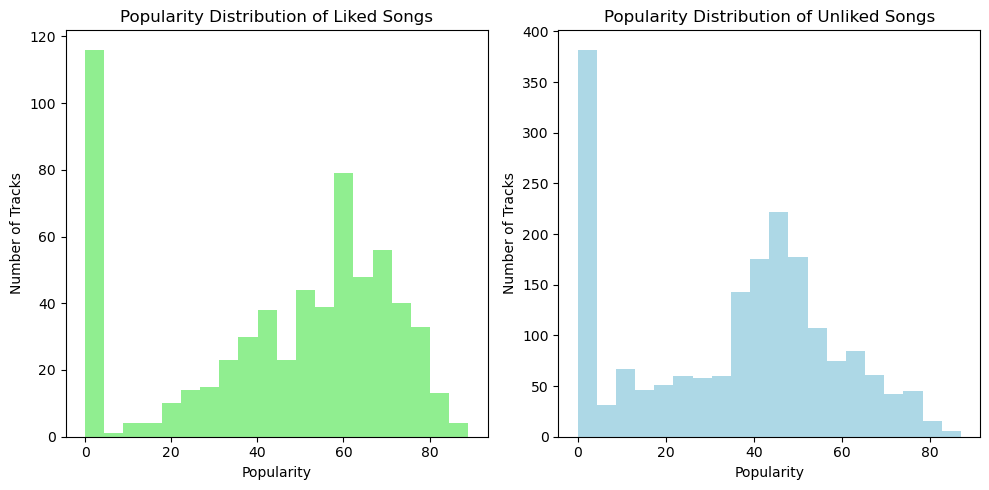

In [44]:
# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the popularity distribution for songs you've liked
axs[0].hist(liked_tracks['popularity'], bins=20, color='lightgreen')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Number of Tracks')
axs[0].set_title('Popularity Distribution of Liked Songs')

# Plot the popularity distribution for songs you haven't liked
axs[1].hist(playlistonly_tracks['popularity'], bins=20, color='lightblue')
axs[1].set_xlabel('Popularity')
axs[1].set_ylabel('Number of Tracks')
axs[1].set_title('Popularity Distribution of Unliked Songs')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

- My Spotify Wrapped profile last year was Time Traveler, descibed as (paraphrasing) you like music that's new to only you. Safe to say Spotify used popularity as a factor in that decision.
- This further explains the mean we saw represented in the descriptive stats where the majority of my songs are less than 20 in terms of the 1-100 scale of popularity
- Was initially surprised to see that the "center" of my distribution in relation to popularity of my liked songs was above the 50 mark, but after mulling it over, that would have to be the case to balance out the large population of songs in the less than 20 range.

## Let's look at popularity in relation to two factors that were related in my songs: Danceability and Energy

Imported plotly for this bubble chart to provide further (personal) insight as to where my songs fall in relation to poverty, feel free to browse

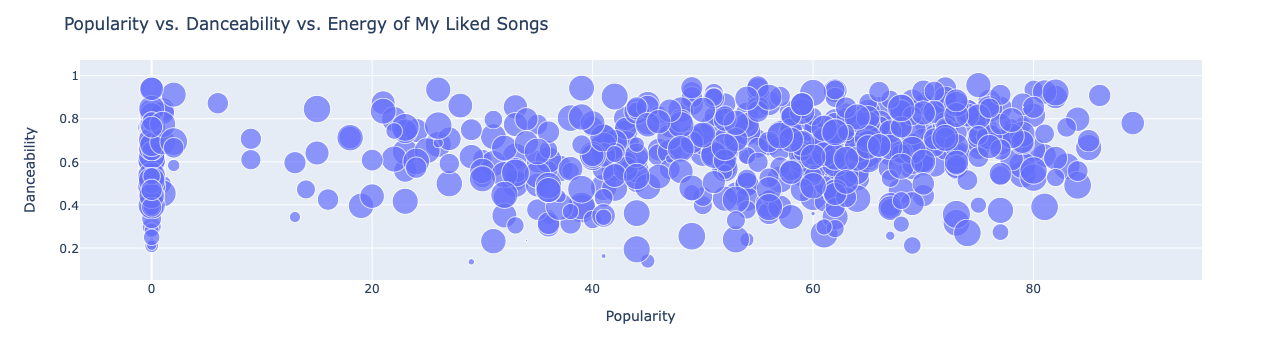

In [64]:
fig = px.scatter(liked_tracks,
                 x='popularity',
                 y='danceability',
                 size='energy',
                 hover_name='track_name',
                 hover_data=['release_date'])

fig.update_layout(
    title="Popularity vs. Danceability vs. Energy of My Liked Songs",
    xaxis_title="Popularity",
    yaxis_title="Danceability",
    height=50
)

fig.show()

- Really happy I found this plot as an option, because while it isnt that informative, it is a great interaction for the web app, and because of the parameters is something I could wrap a function around to let users choose what they see via x, y, size, hover name and data
- This dispelled a thought I had about music taste and popularity in that the newer the song, the more popular it would be, but let's examine that closer:
    - *Interesting Note*: I would later learn to discover that a large portion of my Zero Popularity Songs were actually because the songs were removed from Spotify, but their records in the spotify database remains

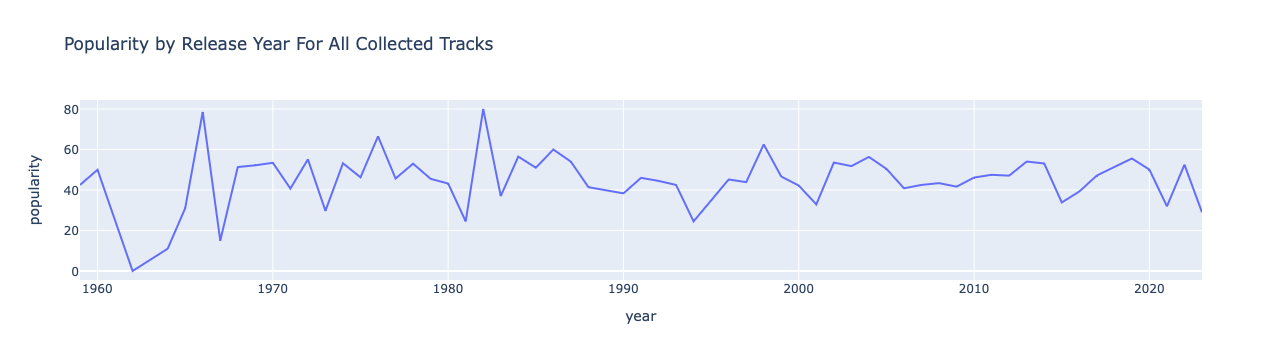

In [63]:
liked_tracks['year'] = pd.to_datetime(my_tracks['release_date']).dt.year
popularity_by_year = liked_tracks.groupby('year')['popularity'].mean().reset_index()

fig = px.line(popularity_by_year, x='year', y='popularity', title='Popularity by Release Year For All Collected Tracks')

fig.show()


- no real pattern here or seasonality
    - *Editing Note*: this isnt a time series, it is what songs from these years and how popular they are today 
- Lowest popularity from 1962, Highest 1982
    - Unrelated, but if this was data of popularity over time, the sharp increase in popularity from 1963 to 1966 could be seen as the rise of rock and roll as protest music during the Vietnam War Protests
- Let's look at one more on popularity and move on using a feature we havent talked about yet, explicit v. not explicit.

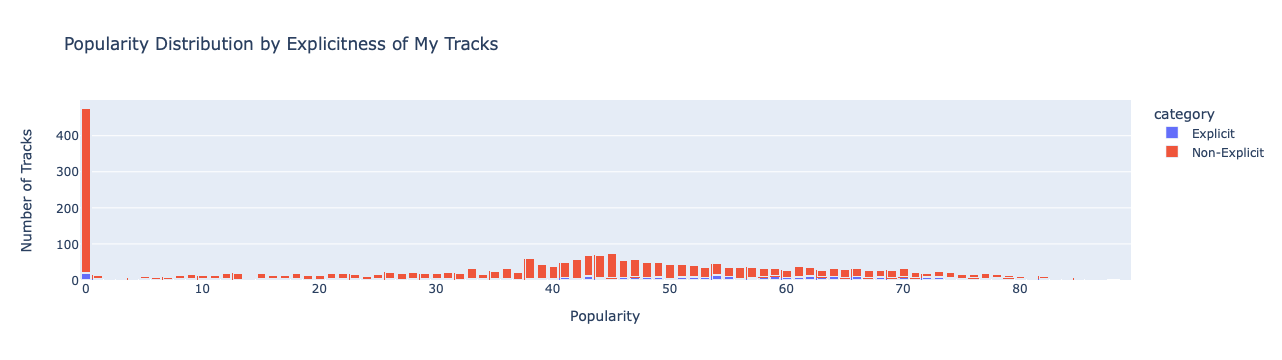

In [67]:
# Create a dataframe with the number of explicit and non-explicit tracks at each popularity level
explicit = my_tracks[my_tracks['explicit'] == True].groupby('popularity')['id'].count().reset_index()
explicit['category'] = 'Explicit'
nonexplicit = my_tracks[my_tracks['explicit'] == False].groupby('popularity')['id'].count().reset_index()
nonexplicit['category'] = 'Non-Explicit'
combined = pd.concat([explicit, nonexplicit])

# Create a stacked bar chart
fig = px.bar(combined, x='popularity', y='id', color='category',
             barmode='stack', title='Popularity Distribution by Explicitness of My Tracks')
fig.update_layout(xaxis_title='Popularity', yaxis_title='Number of Tracks')
fig.show()

- Also not very informative, but getting additional practice with plotly will help when bringing the web application together
- Let's focus our attention on the 3 features that I think best represent my taste and will be the best predictors for classifying songs as my taste

___
### Danceability, Energy, Valence

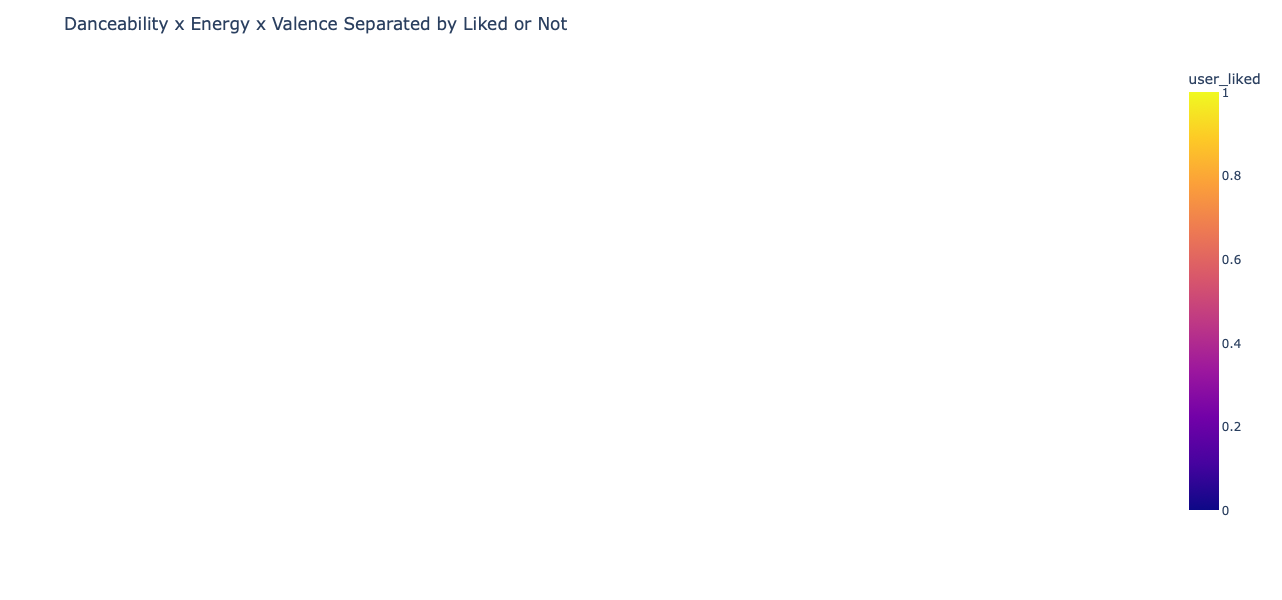

In [90]:
# create 3D scatter plot
# https://plotly.com/python/3d-scatter-plots/
fig = px.scatter_3d(my_tracks, x='danceability', y='energy', z='valence', color='user_liked')

# update the layout of the plot
fig.update_layout(title='Danceability x Energy x Valence Separated by Liked or Not', width=800, height=600)

# show the plot
fig.show()

- Admittedly this was in part because I wanted to try my hand at a 3d plot, but was also sincerely looking for a way to visualize 3 variables at a time
- This does however further outline my observations from the violin plots that as all three variables increase, the more likeley i am to add them to my liked songs.
- Additionally, I think it is worthwhile to actually focus how these three interact with the other variables in the data set to:
    - Look for extranious factors that affect the relationship between the three variables which could introduce bias
- To start, let's compare these three with loudness as it scored high on correlation in relation to energy (~0.84)

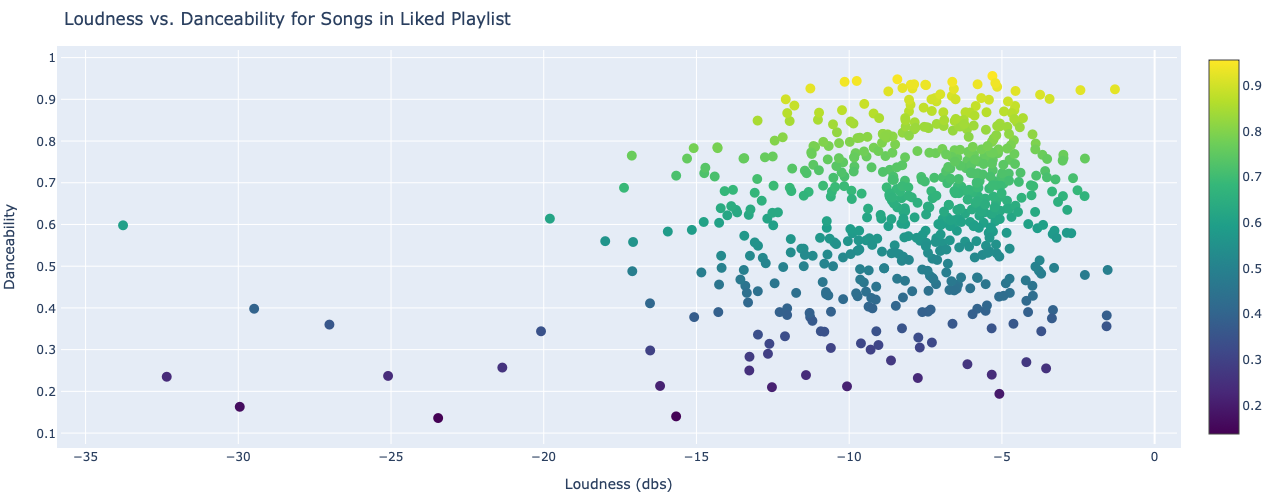

In [89]:
# for future reference:
# https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
fig = go.Figure()

# Add the scatter plot
fig.add_trace(go.Scatter(
    x=liked_tracks['loudness'],
    y=liked_tracks['danceability'],
    mode='markers',
    marker=dict(
        color=liked_tracks['danceability'],
        size=10,
        colorscale='Viridis',
        showscale=True
    ),
    text=liked_tracks['track_name'],
    name='Danceability'
))

# Update the layout
fig.update_layout(
    title='Loudness vs. Danceability for Songs in Liked Playlist',
    xaxis_title='Loudness (dbs)',
    yaxis_title='Danceability',
    hovermode='closest',
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()

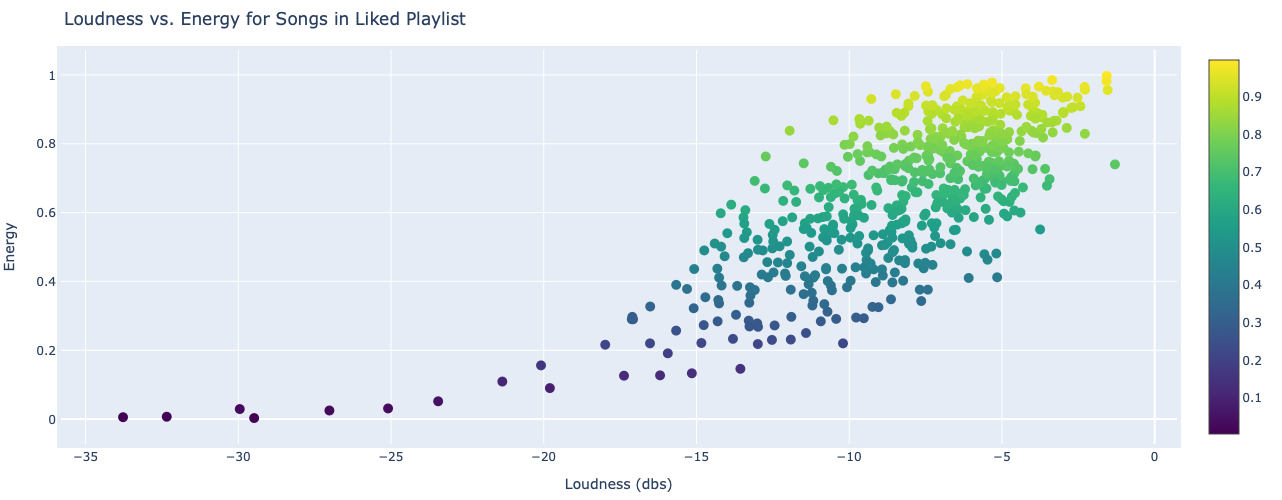

In [87]:
fig = go.Figure()

# Add the scatter plot
fig.add_trace(go.Scatter(
    x=liked_tracks['loudness'],
    y=liked_tracks['energy'],
    mode='markers',
    marker=dict(
        color=liked_tracks['energy'],
        size=10,
        colorscale='Viridis',
        showscale=True
    ),
    text=liked_tracks['track_name'],
    name='Energy'
))

# Update the layout
fig.update_layout(
    title='Loudness vs. Energy for Songs in Liked Playlist',
    xaxis_title='Loudness (dbs)',
    yaxis_title='Energy',
    hovermode='closest',
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()

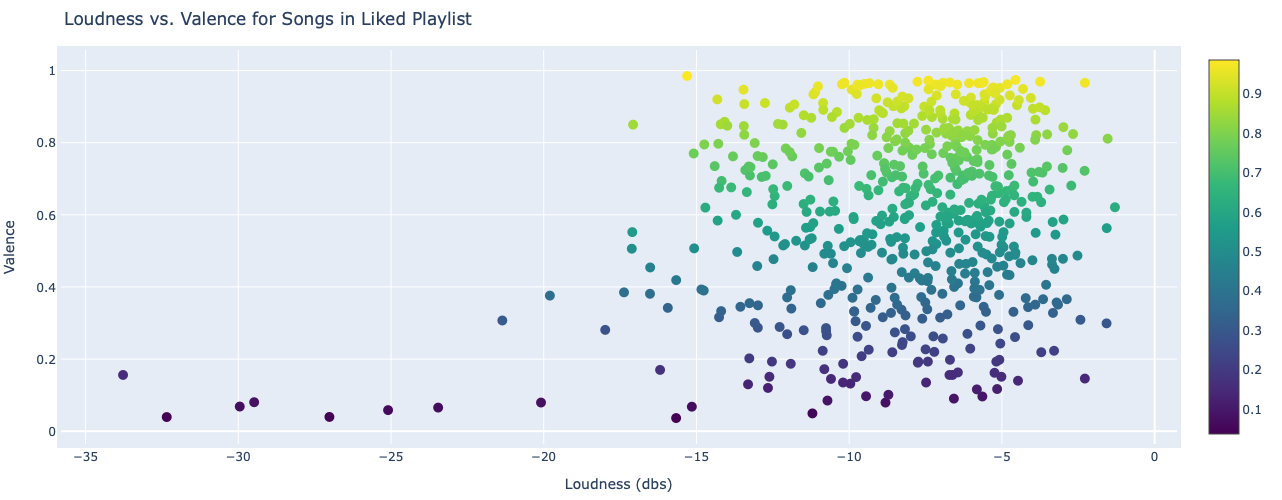

In [86]:
fig = go.Figure()

# Add the scatter plot
fig.add_trace(go.Scatter(
    x=liked_tracks['loudness'],
    y=liked_tracks['valence'],
    mode='markers',
    marker=dict(
        color=liked_tracks['valence'],
        size=10,
        colorscale='Viridis',
        showscale=True
    ),
    text=liked_tracks['track_name'],
    name='Valence'
))

# Update the layout
fig.update_layout(
    title='Loudness vs. Valence for Songs in Liked Playlist',
    xaxis_title='Loudness (dbs)',
    yaxis_title='Valence',
    hovermode='closest',
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()

- We found another factor that will potentially help outline my taste, the louder the songs the denser the population of songs I have actively liked.
- Not surprised after seeing the correlation table, but aside from the curve there's an almost linear relationship between loudness and energy.

Plans For V1&2 Next Steps

Still have a bunch to do EDA wise in relation to other features I havent visualized, but given the timeline I want to start trying to build:
- a classification model first for identifying what songs I would actively like vs. what I wouldnt/havent
    - identify the strongest predictors of my taste
- If I can successfully train a model that predicts my taste, I can better expand that to other potential users
- Afterwards I also want to:
    - Try Clustering/Unsupervised Models and bring in even more data such as tracks and features from songs listened to by other users a given user follows.
    - I have been doing some reading on Content Based Filtering (Based on actions of a user, re: my liked songs) v. Collaboritive Filtering (Based on similar profiles of other users and their actions, re: pulling a given users and the users they follow top tracks and compare)

## Future Versions EDA
---

- Knowing now that my local machine wont be able to handle the largest dataset I collected (Shape: (470038, 4429)), I would want to return to this analysis to do similar plots but including genres. In future versions I will handle this larger dataset with Pytorch and Databricks.
- Some ideas as to what we will look at in the near future:
    - Visualize how genres audio features have changed over the years
    - Visualize music in general has evolved over the years considering audio feature such as:
        - Duration m/s
        - tempo
        - Valence
        - etc.
        - especially curious as to the different features such as danceability, etc. as those arent true measurements, they are scores based on other factors from a contemporary perspective.
    - Find a way to visualize the mean vectors outside of violin distributions
    - There were 4407 genres in the Kaggle Dataset that I eventually pulled to quickly increase the library of songs available to recommend. I would definitely want to take a closer look at what makes up certain genres and see if there is any discernible difference with respect to audio features. A lot of the audio features range from 0-1, which is continuous but also limited in relation to decimal places that would have a profound impact. 
        - Essentially wondering if, at least from the track audio features perspective, all genres are relatively the same.
        - If possible, further down the line of versions, if we could find the dataset try and connect audio features and the actual MIDI files of the track to add another layer of information